In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_data = pd.merge(trial_data, mouse_data, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview

combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volume = combined_data.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
mean_tumor_volume = pd.DataFrame(mean_tumor_volume)
mean_tumor_volume = mean_tumor_volume.reset_index()

# Preview DataFrame
mean_tumor_volume

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
std_error_tumor_volume = combined_data.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
std_error_tumor_volume = pd.DataFrame(std_error_tumor_volume)
std_error_tumor_volume = std_error_tumor_volume.reset_index()

# Preview DataFrame
std_error_tumor_volume

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [4]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_volume_pivot = mean_tumor_volume.pivot(values ="Tumor Volume (mm3)", index="Timepoint", columns="Drug")

std_error_tumor_volume_pivot = std_error_tumor_volume.pivot(values ="Tumor Volume (mm3)", index="Timepoint", columns="Drug")

# Preview that Reformatting worked
mean_tumor_volume_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


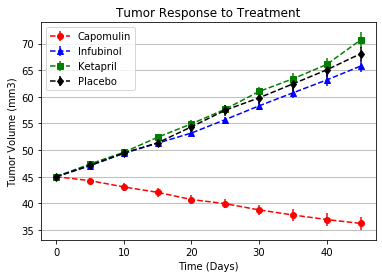

In [5]:
# Generate the Plot (with Error Bars)
tumor_x = mean_tumor_volume_pivot.index

plt.errorbar(tumor_x, mean_tumor_volume_pivot["Capomulin"],
             yerr=std_error_tumor_volume_pivot["Capomulin"], fmt="o--", label = "Capomulin", color="r")

plt.errorbar(tumor_x, mean_tumor_volume_pivot["Infubinol"],
             yerr=std_error_tumor_volume_pivot["Infubinol"], fmt="^--", label = "Infubinol", color="b")

plt.errorbar(tumor_x, mean_tumor_volume_pivot["Ketapril"],
             yerr=std_error_tumor_volume_pivot["Ketapril"], fmt="s--", label = "Ketapril", color="g")

plt.errorbar(tumor_x, mean_tumor_volume_pivot["Placebo"],
             yerr=std_error_tumor_volume_pivot["Placebo"], fmt="d--", label = "Placebo", color="k")

plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(axis="y")
plt.legend(loc="upper left")

# Save the Figure
plt.savefig("../Images/treatment.png")
plt.show()

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_meta_res = combined_data.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()

# Convert to DataFrame
mean_meta_res = pd.DataFrame(mean_meta_res)
mean_meta_res = mean_meta_res.reset_index()

# Preview DataFrame
mean_meta_res.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
std_error_meta_res = combined_data.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()

# Convert to DataFrame
std_error_meta_res = pd.DataFrame(std_error_meta_res)
std_error_meta_res = std_error_meta_res.reset_index()

# Preview DataFrame
std_error_meta_res.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [8]:
# Minor Data Munging to Re-Format the Data Frames
mean_meta_res_pivot = mean_meta_res.pivot(values ="Metastatic Sites", index="Timepoint", columns="Drug")

std_error_meta_res_pivot = std_error_meta_res.pivot(values ="Metastatic Sites", index="Timepoint", columns="Drug")

# Preview that Reformatting worked
mean_meta_res_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


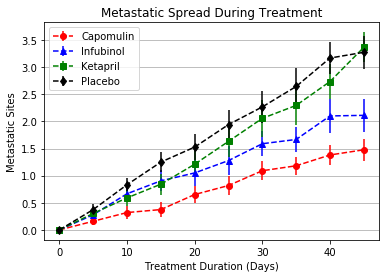

In [9]:
# Generate the Plot (with Error Bars)
meta_x = mean_meta_res_pivot.index

plt.errorbar(meta_x, mean_meta_res_pivot["Capomulin"],
             yerr=std_error_meta_res_pivot["Capomulin"], fmt="o--", label = "Capomulin", color="r")

plt.errorbar(meta_x, mean_meta_res_pivot["Infubinol"],
             yerr=std_error_meta_res_pivot["Infubinol"], fmt="^--", label = "Infubinol", color="b")

plt.errorbar(meta_x, mean_meta_res_pivot["Ketapril"],
             yerr=std_error_meta_res_pivot["Ketapril"], fmt="s--", label = "Ketapril", color="g")

plt.errorbar(meta_x, mean_meta_res_pivot["Placebo"],
             yerr=std_error_meta_res_pivot["Placebo"], fmt="d--", label = "Placebo", color="k")

plt.title("Metastatic Spread During Treatment")
plt.ylabel("Metastatic Sites")
plt.xlabel("Treatment Duration (Days)")
plt.grid(axis="y")
plt.legend(loc="upper left")

# Save the Figure
plt.savefig("../Images/spread.png")
plt.show()

## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
count_mice = combined_data.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].count()

# Convert to DataFrame
count_mice = pd.DataFrame(count_mice)
count_mice = count_mice.reset_index()

# Preview DataFrame
count_mice.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [11]:
# Minor Data Munging to Re-Format the Data Frames
count_mice_pivot = count_mice.pivot(values ="Tumor Volume (mm3)", index="Timepoint", columns="Drug")

# Preview that Reformatting worked
count_mice_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


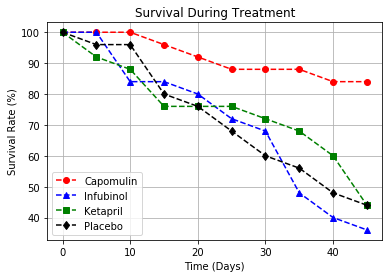

In [12]:
# Generate the Plot (Accounting for percentages)
plt.plot(4*count_mice_pivot["Capomulin"], "ro", linestyle="--", label = "Capomulin")
plt.plot(4*count_mice_pivot["Infubinol"], "b^", linestyle="--", label = "Infubinol")
plt.plot(4*count_mice_pivot["Ketapril"], "gs", linestyle="--", label = "Ketapril")
plt.plot(4*count_mice_pivot["Placebo"], "kd", linestyle="--", label = "Placebo")

plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.grid()
plt.legend(loc="bottom left")

# Save the Figure
plt.savefig("../Images/survival.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [13]:
# Calculate the percent changes for each drug
percent_change_mean =  100 * ((mean_tumor_volume_pivot.loc[45]) - (mean_tumor_volume_pivot.loc[0])) / (mean_tumor_volume_pivot.loc[0])
percent_change_std_err =  100 * ((std_error_tumor_volume_pivot.loc[45]) - (std_error_tumor_volume_pivot.loc[0])) / (std_error_tumor_volume_pivot.loc[0])

# Display the data to confirm
percent_change_mean

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

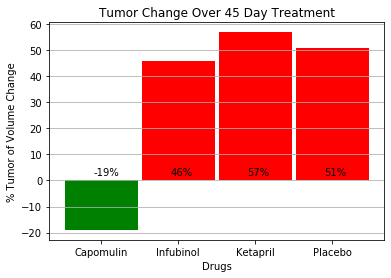

In [14]:
# Store all Relevant Percent Changes into a Tuple
percent_change_tuple = (int(round(percent_change_mean["Capomulin"])), 
               int(round(percent_change_mean["Infubinol"])), 
               int(round(percent_change_mean["Ketapril"])), 
               int(round(percent_change_mean["Placebo"])))

bars = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
height = percent_change_tuple
y = np.arange(len(bars))
width = 1/1.05
plt.bar(y, height, width, color=["green", "red", "red", "red"])
plt.grid(axis="y", which="major")
plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel("Drugs")
plt.xticks(y, bars)
plt.ylabel("% Tumor of Volume Change")

for i,j in zip(y, height):
    plt.text(i-0.1, 2, f"{j}%")

plt.savefig("../Images/change.png")

plt.show()
